In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
c = 1
u_inf = 1
xc, yc = -0.15, 0
N_trans, N_rad = 100, 145
r_beg, r_end = 1.15, 5
phi_beg, phi_end = 0, 2 * np.pi
AoA = 20 / 180 * np.pi

## Строим сетку.

In [3]:
def transform(z, c):
    
    return z + c ** 2 / z

In [4]:
phis = np.linspace(phi_beg, phi_end, N_rad)
rs = np.linspace(r_beg, r_end, N_trans)

PHIS, RS = np.meshgrid(phis, rs)

X0, Y0 = RS * np.cos(PHIS) + xc, RS * np.sin(PHIS) + yc
Z = transform(X0 + Y0 * 1j, c)
X1, Y1 = Z.real, Z.imag

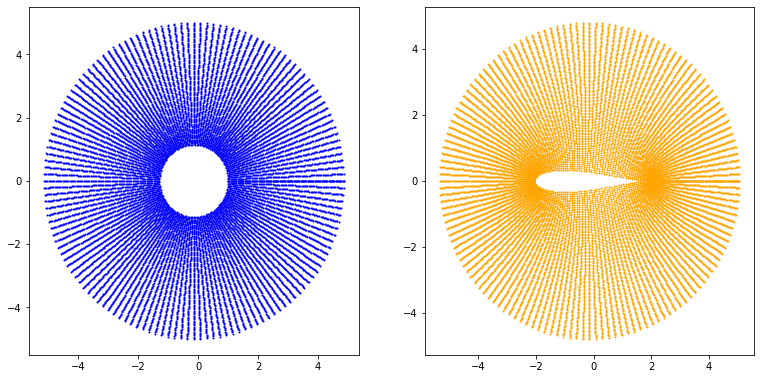

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6.4))

axs[0].scatter(X0, Y0, color='b', s=1)
axs[1].scatter(X1, Y1, color='orange', s=1);

## Функция тока.

In [6]:
kappa = 2 * np.pi * u_inf * r_beg ** 2

print(kappa)

8.309512568745001


In [7]:
zc = transform(xc + yc * 1j, c)
xc1, yc1 = zc.real, zc.imag

In [8]:
def calculate_dipole_stream(kappa, x0, y0, X, Y):
    
    psi = - kappa / 2 / np.pi * (Y - y0) / ((X - x0) ** 2 + (Y - y0) ** 2)
    
    return psi

In [9]:
psi0_dipole = calculate_dipole_stream(kappa, xc, yc, X0, Y0)
psi0_stream = u_inf * Y0

psi0 = psi0_dipole + psi0_stream

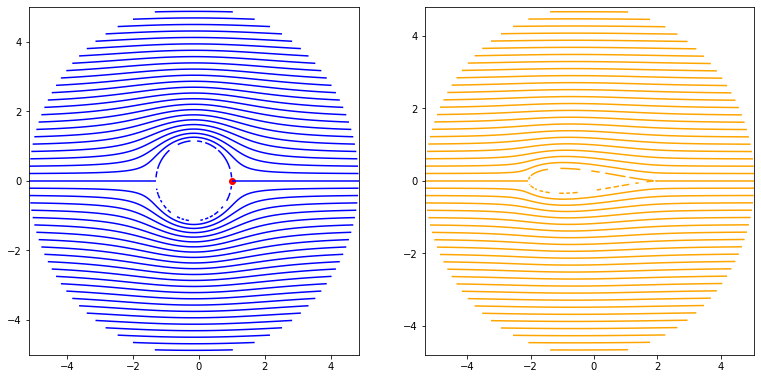

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6.4))

axs[0].contour(X0, Y0, psi0, colors='b', linestyles='solid', levels=50)
axs[1].contour(X1, Y1, psi0, colors='orange', linestyles='solid', levels=50)
axs[0].scatter(1, 0, c='r');

## Поле скорости.

In [11]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = - strength/(2*np.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*np.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

In [12]:
u0_d, v0_d = get_velocity_doublet(kappa, xc, yc, X0, Y0)
u0_s = u_inf * np.ones((N_trans, N_rad))
u0, v0 = u0_d + u0_s, v0_d

(-3.0, 3.0)

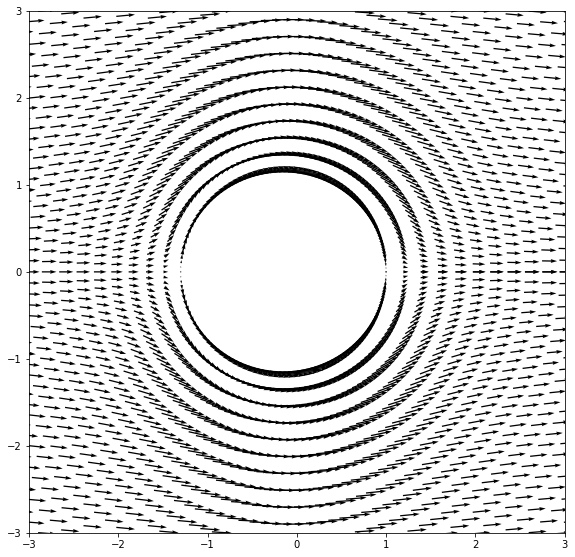

In [13]:
fig, ax = plt.subplots(figsize=(9.6, 9.6))

ax.quiver(X0[::5], Y0[::5], u0[::5], v0[::5], scale=30)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)



In [14]:
vz = (u0 - v0 * 1j) / (1 - (c / (X0 + Y0 * 1j) ** 2))
u1 = vz.real
v1 = -vz.imag

1.007885100722779


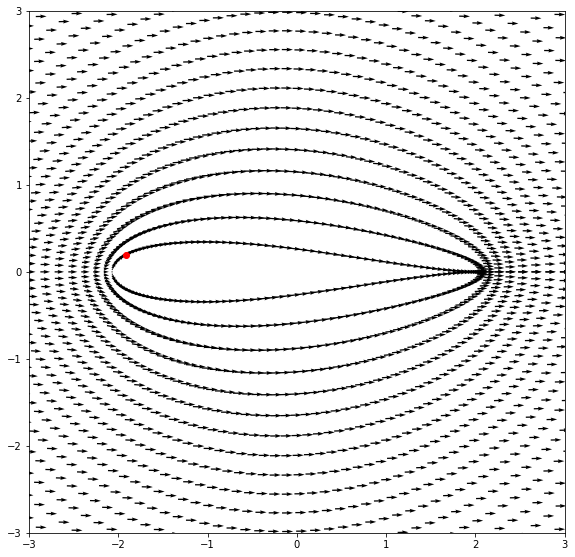

In [15]:
fig, ax = plt.subplots(figsize=(9.6, 9.6))

ax.quiver(X1[::5], Y1[::5], u1[::5], v1[::5], scale=50)
ax.scatter(X1[0][62], Y1[0][62], color='r')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

print(np.sqrt(u1[0][62] ** + v1[0][62] ** 2))

## Коэффициент давления.

In [16]:
def calculate_cp(U, V, u_inf):
    
    return 1 - (U ** 2 + V ** 2) / u_inf ** 2

In [17]:
cp0 = calculate_cp(u0, v0, u_inf)
cp1 = calculate_cp(u1, v1, u_inf)

print(cp1.min(), cp1.max())

-0.6877556740924042 1.0


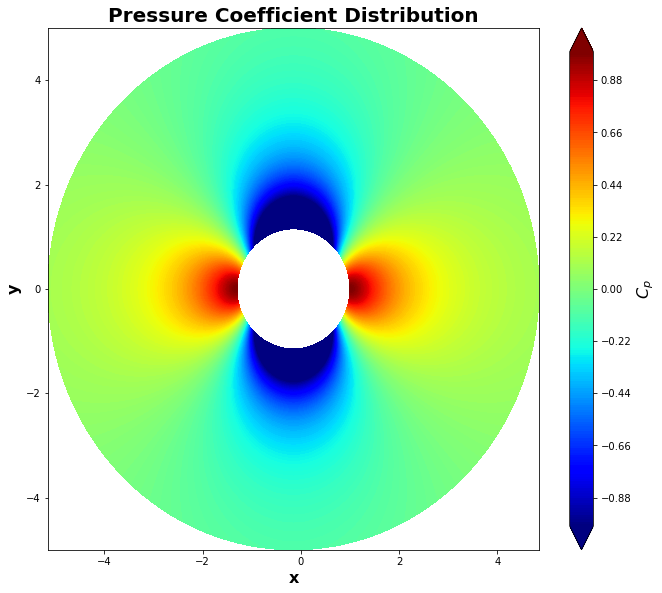

In [18]:
fig, ax = plt.subplots(figsize=(11, 9.6))

ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('y', fontsize=16, fontweight='bold')
ax.set_title('Pressure Coefficient Distribution', fontsize=20, fontweight='bold')

contf = plt.contourf(X0, Y0, cp0, levels=np.linspace(-1, 1, 200), 
                     extend='both', cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.arange(-0.88, 1, 0.22))

-0.6877556740924042

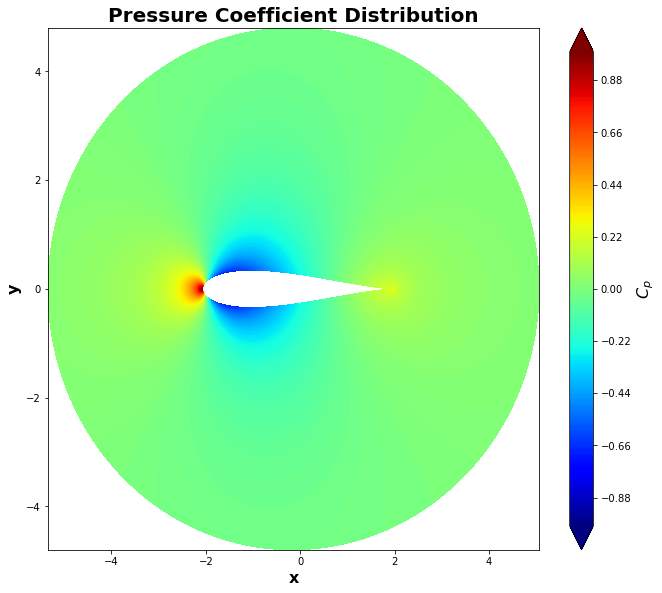

In [19]:
fig, ax = plt.subplots(figsize=(11, 9.6))

ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('y', fontsize=16, fontweight='bold')
ax.set_title('Pressure Coefficient Distribution', fontsize=20, fontweight='bold')

contf = plt.contourf(X1, Y1, cp1, levels=np.linspace(-1, 1, 200), 
                     extend='both', cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.arange(-0.88, 1, 0.22))
cp1[0].min()

## Функция тока с углом атаки.

In [20]:
X0_ = (X0 - xc) * np.cos(AoA) + (Y0 - yc) * np.sin(AoA)
Y0_ = (Y0 - yc) * np.cos(AoA) - (X0 - xc) * np.sin(AoA)

psi0_dipole_ = calculate_dipole_stream(kappa, 0, 0, X0_, Y0_)
psi0_stream_ = u_inf * Y0_

psi0_ = psi0_dipole_ + psi0_stream_

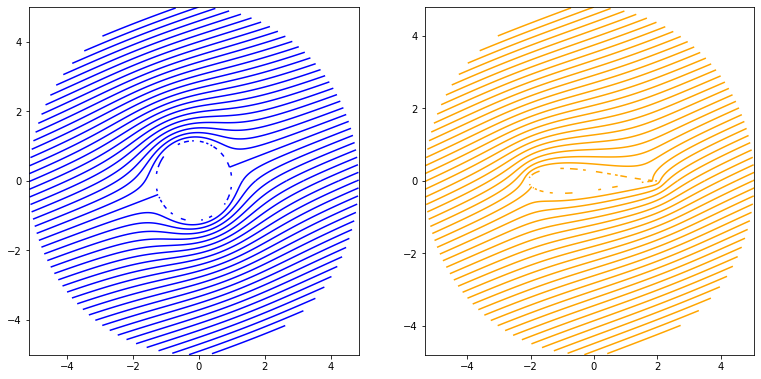

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6.4))

axs[0].contour(X0, Y0, psi0_, colors='b', linestyles='solid', levels=50)
axs[1].contour(X1, Y1, psi0_, colors='orange', linestyles='solid', levels=50);

## Поле скоростей с углом атаки. 

In [22]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = - strength/(2*np.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*np.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

In [23]:
u0_d_, v0_d_ = get_velocity_doublet(kappa, 0, 0, X0_, Y0_)
u0_s = u_inf * np.ones((N_trans, N_rad))
u0_, v0_ = u0_d_ + u0_s, v0_d_

U0 = u0_ * np.cos(AoA) - v0_ * np.sin(AoA)
V0 = u0_ * np.sin(AoA) + v0_ * np.cos(AoA)

(-3.0, 3.0)

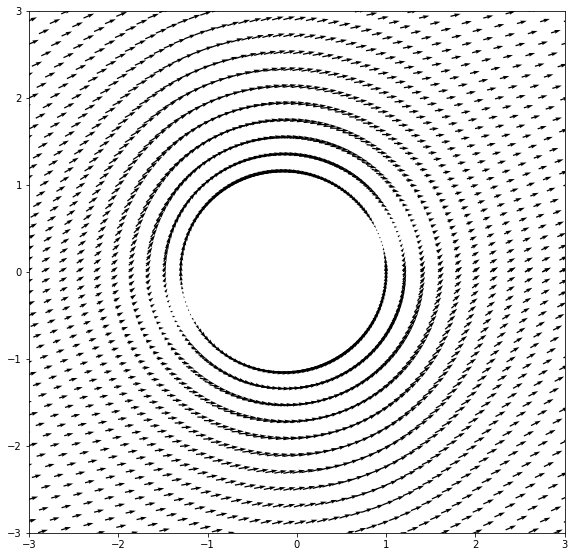

In [24]:
fig, ax = plt.subplots(figsize=(9.6, 9.6))

ax.quiver(X0[::5], Y0[::5], U0[::5], V0[::5], scale=50)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

In [25]:
Vz = (U0 - V0 * 1j) / (1 - (c / (X0 + Y0 * 1j) ** 2))
U1 = Vz.real
V1 = -Vz.imag

(-3.0, 3.0)

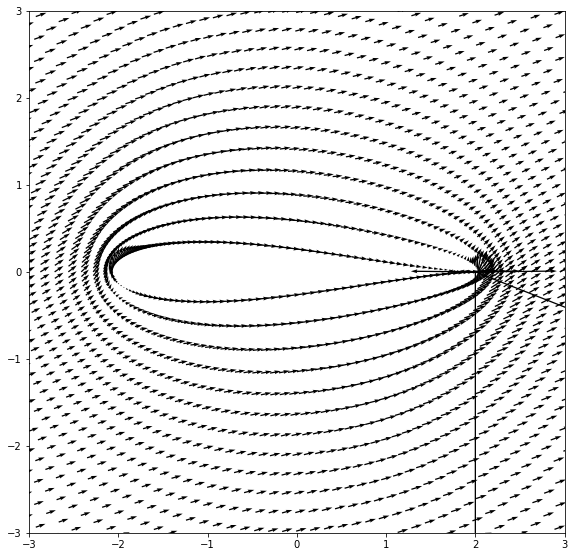

In [26]:
fig, ax = plt.subplots(figsize=(9.6, 9.6))

ax.quiver(X1[::5], Y1[::5], U1[::5], V1[::5], scale=50)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

## Коэффициенты давления с углом атаки.

In [27]:
cp0 = calculate_cp(U0, V0, u_inf)
cp1 = calculate_cp(U1, V1, u_inf)



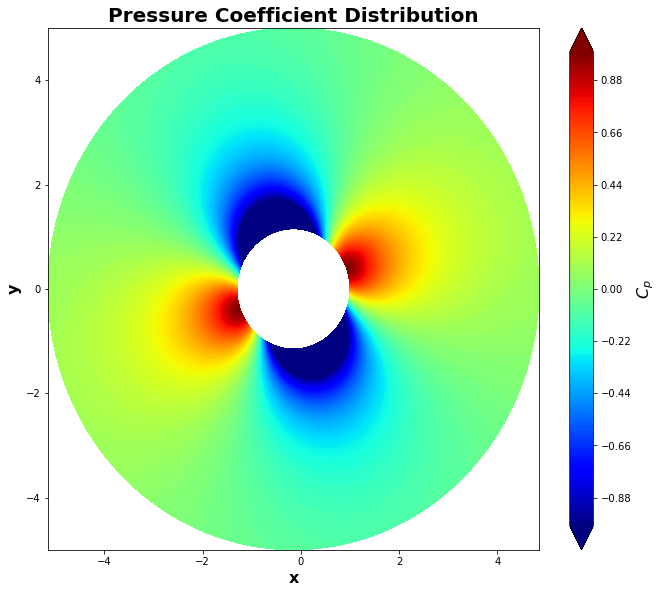

In [28]:
fig, ax = plt.subplots(figsize=(11, 9.6))

ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('y', fontsize=16, fontweight='bold')
ax.set_title('Pressure Coefficient Distribution', fontsize=20, fontweight='bold')

contf = plt.contourf(X0, Y0, cp0, levels=np.linspace(-1, 1, 200), 
                     extend='both', cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.arange(-0.88, 1, 0.22))

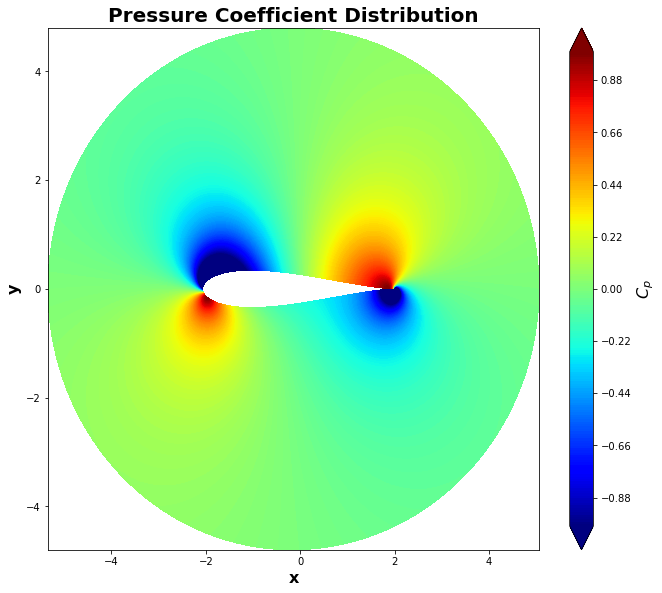

In [29]:
fig, ax = plt.subplots(figsize=(11, 9.6))

ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('y', fontsize=16, fontweight='bold')
ax.set_title('Pressure Coefficient Distribution', fontsize=20, fontweight='bold')

contf = plt.contourf(X1, Y1, cp1, levels=np.linspace(-1, 1, 200), 
                     extend='both', cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.arange(-0.88, 1, 0.22))

## Подъёмная сила.

In [63]:
x0_ = (1 - xc) * np.cos(AoA) + (0 - yc) * np.sin(AoA)


gamma = 4 * np.pi * u_inf * np.sqrt(1.15 ** 2 - x0_ ** 2)

print(gamma)

4.942644660397584


In [64]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength/(4*np.pi)*np.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [65]:
X0_ = (X0 - xc) * np.cos(AoA) + (Y0 - yc) * np.sin(AoA)
Y0_ = (Y0 - yc) * np.cos(AoA) - (X0 - xc) * np.sin(AoA)

psi0_dipole_ = calculate_dipole_stream(kappa, 0, 0, X0_, Y0_)
psi0_stream_ = u_inf * Y0_
psi0_vortex = get_stream_function_vortex(gamma, 0, 0, X0_, Y0_)

psi0_ = psi0_dipole_ + psi0_stream_ + psi0_vortex

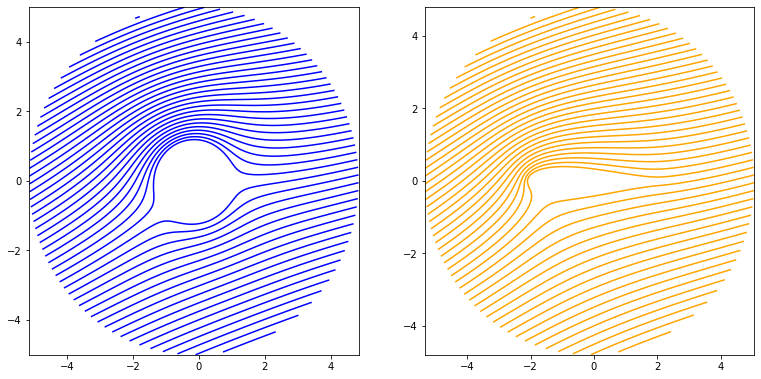

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6.4))

axs[0].contour(X0, Y0, psi0_, colors='b', linestyles='solid', levels=50)
axs[1].contour(X1, Y1, psi0_, colors='orange', linestyles='solid', levels=50);

In [67]:
def get_velocity_vortex(strength, xv, yv, X, Y):
   
    u = + strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

In [68]:
u0_d_, v0_d_ = get_velocity_doublet(kappa, 0, 0, X0_, Y0_)
u0_v, v0_v = get_velocity_vortex(gamma, 0, 0, X0_, Y0_)
u0_s = u_inf * np.ones((N_trans, N_rad))
u0_, v0_ = u0_d_ + u0_s + u0_v, v0_d_ + v0_v

U0 = u0_ * np.cos(AoA) - v0_ * np.sin(AoA)
V0 = u0_ * np.sin(AoA) + v0_ * np.cos(AoA)

(-3.0, 3.0)

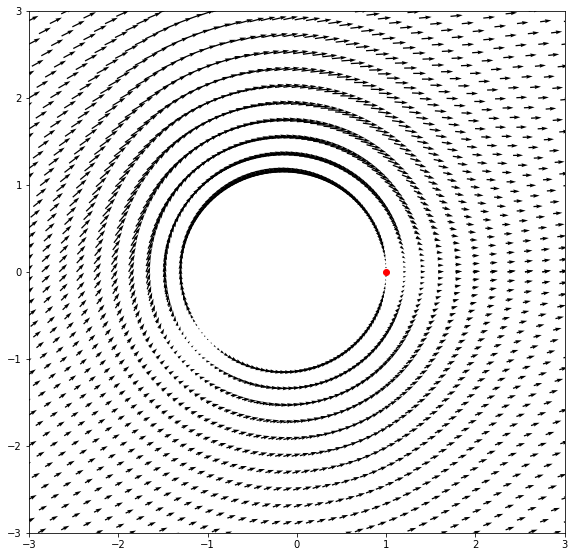

In [69]:
fig, ax = plt.subplots(figsize=(9.6, 9.6))

ax.quiver(X0[::5], Y0[::5], U0[::5], V0[::5], scale=50)
ax.scatter(1, 0, color='r')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

In [70]:
Vz = (U0 - V0 * 1j) / (1 - (c / (X0 + Y0 * 1j) ** 2))
U1 = Vz.real
V1 = -Vz.imag

(-3.0, 3.0)

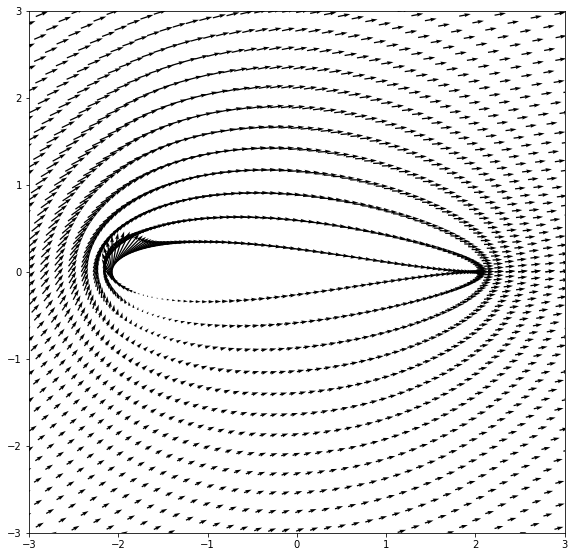

In [71]:
fig, ax = plt.subplots(figsize=(9.6, 9.6))

ax.quiver(X1[::5], Y1[::5], U1[::5], V1[::5], scale=50)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

In [72]:
cp0 = calculate_cp(U0, V0, u_inf)
cp1 = calculate_cp(U1, V1, u_inf)



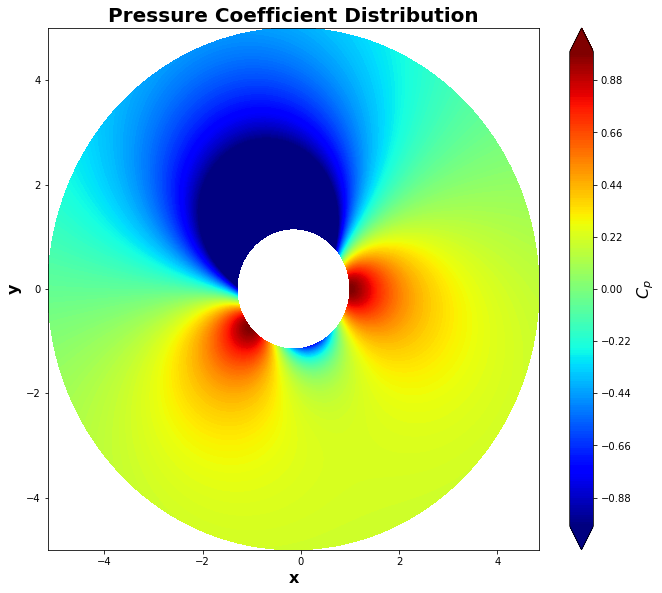

In [73]:
fig, ax = plt.subplots(figsize=(11, 9.6))

ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('y', fontsize=16, fontweight='bold')
ax.set_title('Pressure Coefficient Distribution', fontsize=20, fontweight='bold')

contf = plt.contourf(X0, Y0, cp0, levels=np.linspace(-1, 1, 200), 
                     extend='both', cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.arange(-0.88, 1, 0.22))

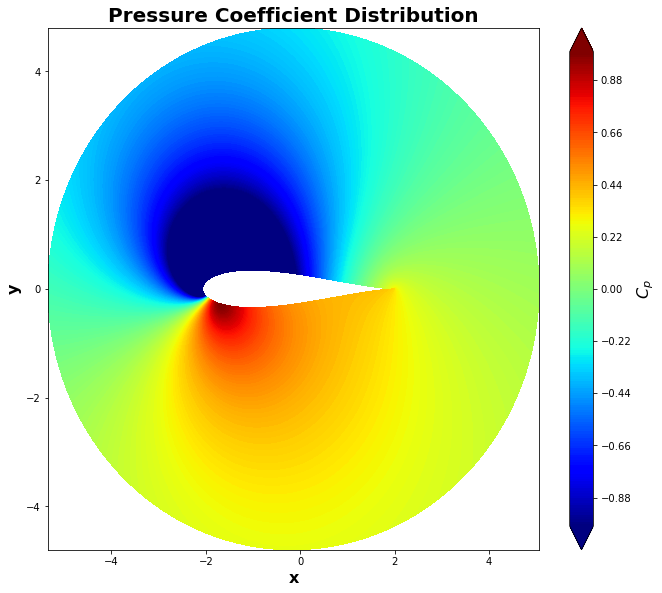

In [74]:
fig, ax = plt.subplots(figsize=(11, 9.6))

ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('y', fontsize=16, fontweight='bold')
ax.set_title('Pressure Coefficient Distribution', fontsize=20, fontweight='bold')

contf = plt.contourf(X1, Y1, cp1, levels=np.linspace(-1, 1, 200), 
                     extend='both', cmap='jet')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.arange(-0.88, 1, 0.22))